In [1]:

import obspy as op
import numpy as np
import cartopy.crs as ccrs
from obspy.clients.fdsn import Client
import cartopy.feature as cfeature

import pandas as pd

import re

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime

In [4]:
currentDT = datetime.datetime.now()
print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("2010-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2015-01-01T00:00:00") #end time of the request
minMag = 8
# read https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html
catalog = client.get_events(starttime=t1, endtime=t2, minmagnitude=minMag)

currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))


Download initiated. Should take about 8 seconds but requires an internet connection.
Download began:  2023-11-01 14:19:53.715542
Download ended:  2023-11-01 14:19:53.804432


In [5]:
catalog_df = pd.DataFrame(catalog)
catalog[0].origins[0].time.year


2014

In [6]:
oklahoma_rectangle1 = [[36.3, 36.992349], [-103.010302, -99.981570]]
oklahoma_rectangle2 = [[33.647016, 37], [-99.982, -94.623809]]

minlat1 = oklahoma_rectangle1[0][0]
maxlat1 = oklahoma_rectangle1[0][1]
minlong1 = oklahoma_rectangle1[1][0]
maxlong1 = oklahoma_rectangle1[1][1]

minlat2 = oklahoma_rectangle2[0][0]
maxlat2 = oklahoma_rectangle2[0][1]
minlong2 = oklahoma_rectangle2[1][0]
maxlong2 = oklahoma_rectangle2[1][0]



In [7]:
currentDT = datetime.datetime.now()
#print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2023-10-29T00:00:00") #end time of the request
minMag = 5
# read https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html
catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=30, maxlatitude=40,
minlongitude=-110, maxlongitude=-90, minmagnitude=minMag)



currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

Download began:  2023-11-01 14:19:54.990462
Download ended:  2023-11-01 14:20:02.362233


In [9]:
# #plt.rcParams['figure.figsize'] = [15, 7]
# fig = plt.figure(figsize=(50,30))

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude = 0))

# events = ax.scatter(evlon, evlat, c=evdep, s=evmag, transform=ccrs.PlateCarree())
    
# #Add coastlines and gridlines for lat/lon
# ax.coastlines(resolution='10m', color='gray')
# ax.gridlines()

# cbar = plt.colorbar(events, shrink=0.7)
# cbar.set_label('Depth [km]', fontsize=50)
# cbar.ax.tick_params(labelsize=40)

# print('A world map with some earthquakes should appear. [Some warnings may also be printed.]')
# plt.show()

In [10]:
oklahoma_rectangle1 = [[36.489977,36.992349], [-103.010302, -99.981570]]
oklahoma_rectangle2 = [[33.647016,37], [-99.982, -94.623809]]
def counter(catalog):
    is_oaklahoma = []
    oaklahoma_eq = 0
    elsewhere_eq = 0
    evlat =[]
    evlon =[]
    evdep =[]
    evmag = []
    years = []

    for i in range(len(catalog)):
        lat           = catalog[i].origins[0].latitude
        long          = catalog[i].origins[0].longitude
        time          = catalog[i].origins[0].time
        year          = catalog[i].origins[0].time.year
        timeDiffInSec = catalog[0].origins[0].time - catalog[i].origins[0].time
        mag           = catalog[i].magnitudes[0].mag
        if lat > oklahoma_rectangle1[0][0] and lat < oklahoma_rectangle1[0][1] and long > oklahoma_rectangle1[1][0] and long < oklahoma_rectangle1[1][1]:
            oaklahoma_eq += 1
            is_oaklahoma.append(i)
            org = catalog[i].origins
            evlat.append(lat)
            evlon.append(long)
            if (org[0].depth==None):
                evdep.append(0.0)
            else:
                evdep.append((org[0].depth) / 1000.0)
            evmag.append((catalog[i].magnitudes[0].mag)**4/2)
            years.append(year)

        elif lat > oklahoma_rectangle2[0][0] and lat < oklahoma_rectangle2[0][1] and long > oklahoma_rectangle2[1][0] and long < oklahoma_rectangle2[1][1]:
            oaklahoma_eq += 1
            is_oaklahoma.append(i)
            org = catalog[i].origins
            evlat.append(lat)
            evlon.append(long)
            if (org[0].depth==None):
                evdep.append(0.0)
            else:
                evdep.append((org[0].depth) / 1000.0)
            evmag.append((catalog[i].magnitudes[0].mag)**4/2)
            years.append(year)
        else:
            elsewhere_eq += 1
    return years, evmag, evlat, evlon, evdep, oaklahoma_eq

Download began:  2023-11-01 23:03:00.450309
Download ended:  2023-11-01 23:03:07.259858
The total number of earthquakes in Oaklahoma is: 10


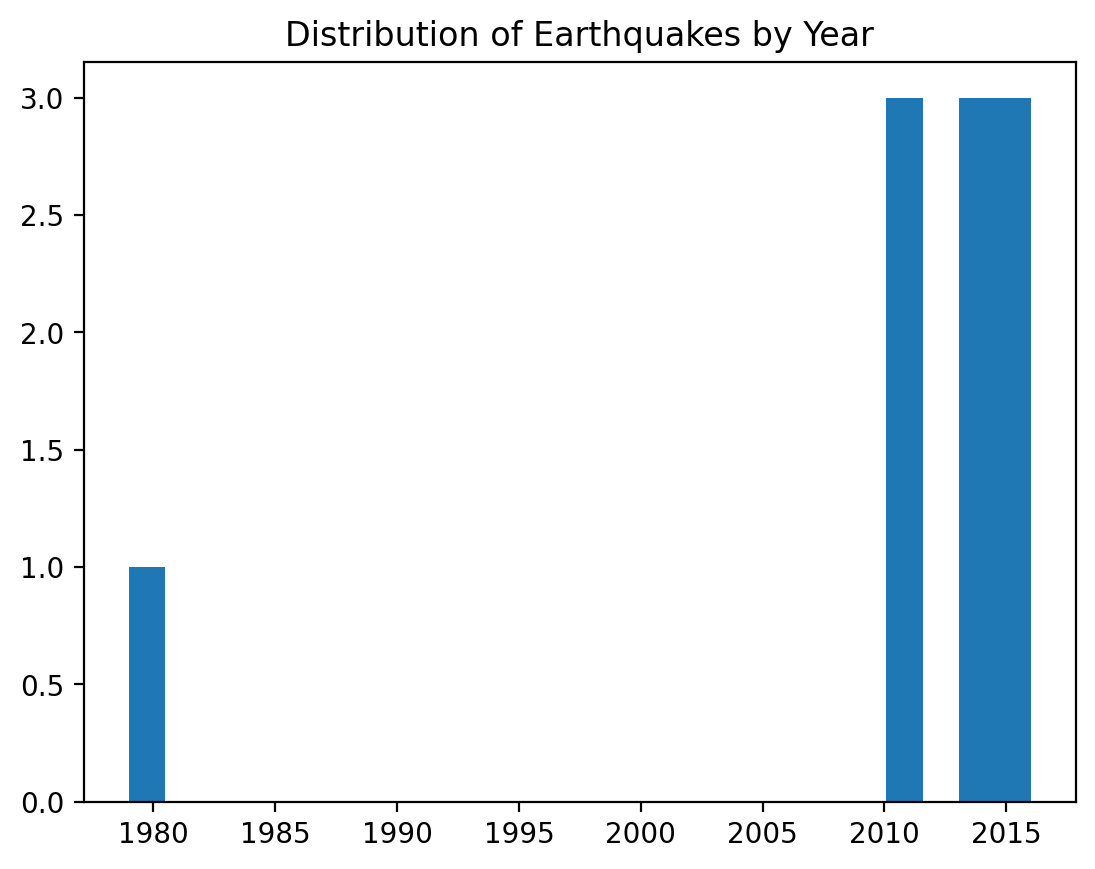

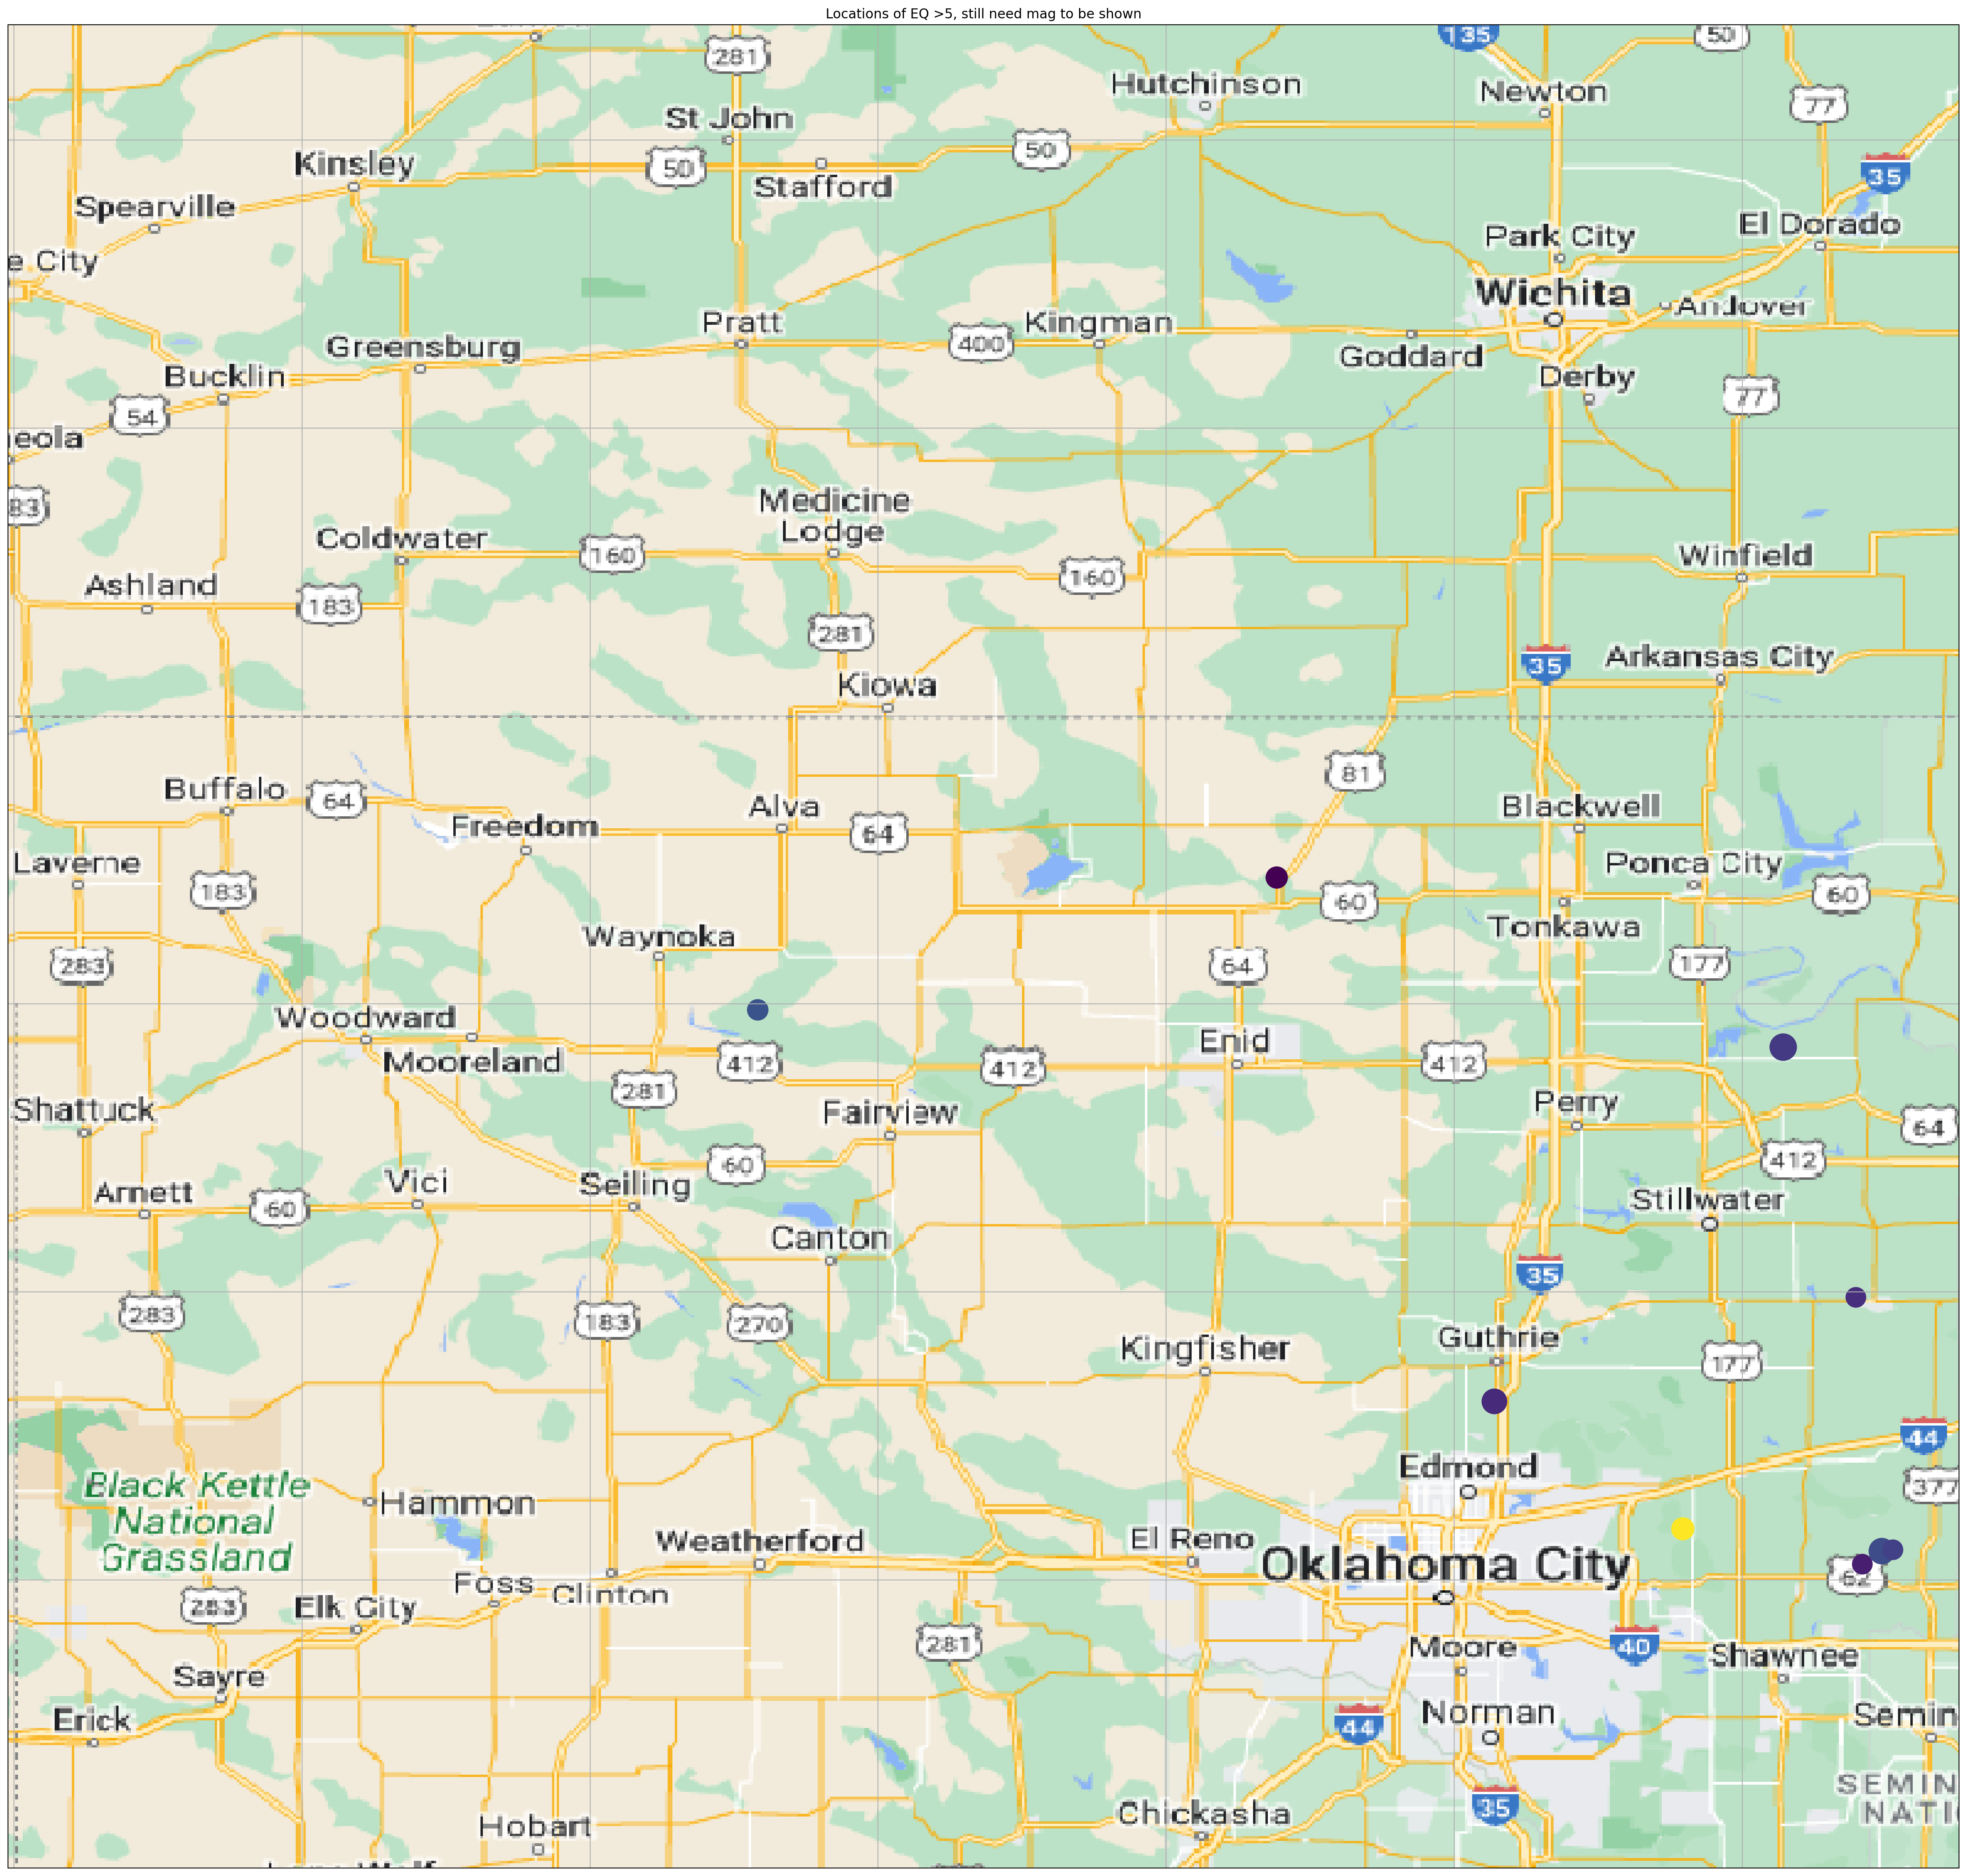

In [37]:
currentDT = datetime.datetime.now()
#print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2023-10-29T00:00:00") #end time of the request
minMag = 5
# read https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html
catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=30, maxlatitude=40,
minlongitude=-110, maxlongitude=-90, minmagnitude=minMag)



currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

years, evmag, evlat, evlon, evdep, num_eq = counter(catalog)

print('The total number of earthquakes in Oaklahoma is:', num_eq)

plt.hist(years, bins=25)
plt.title('Distribution of Earthquakes by Year')
plt.show()




fig = plt.figure(figsize=(50,30)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([-100.010302,-96.623809,35,38.2], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(evlon, evlat, c=evdep,s=evmag,transform=ccrs.PlateCarree()) 
# cbar = plt.colorbar(evmag, shrink=0.7)
# cbar.set_label('Depth [km]', fontsize=50)
# cbar.ax.tick_params(labelsize=40)
plt.title('Locations of EQ >5, still need mag to be shown')
plt.show()

Download began:  2023-11-01 23:02:28.461926
Download ended:  2023-11-01 23:02:35.808569
The total number of earthquakes in Oaklahoma is: 282


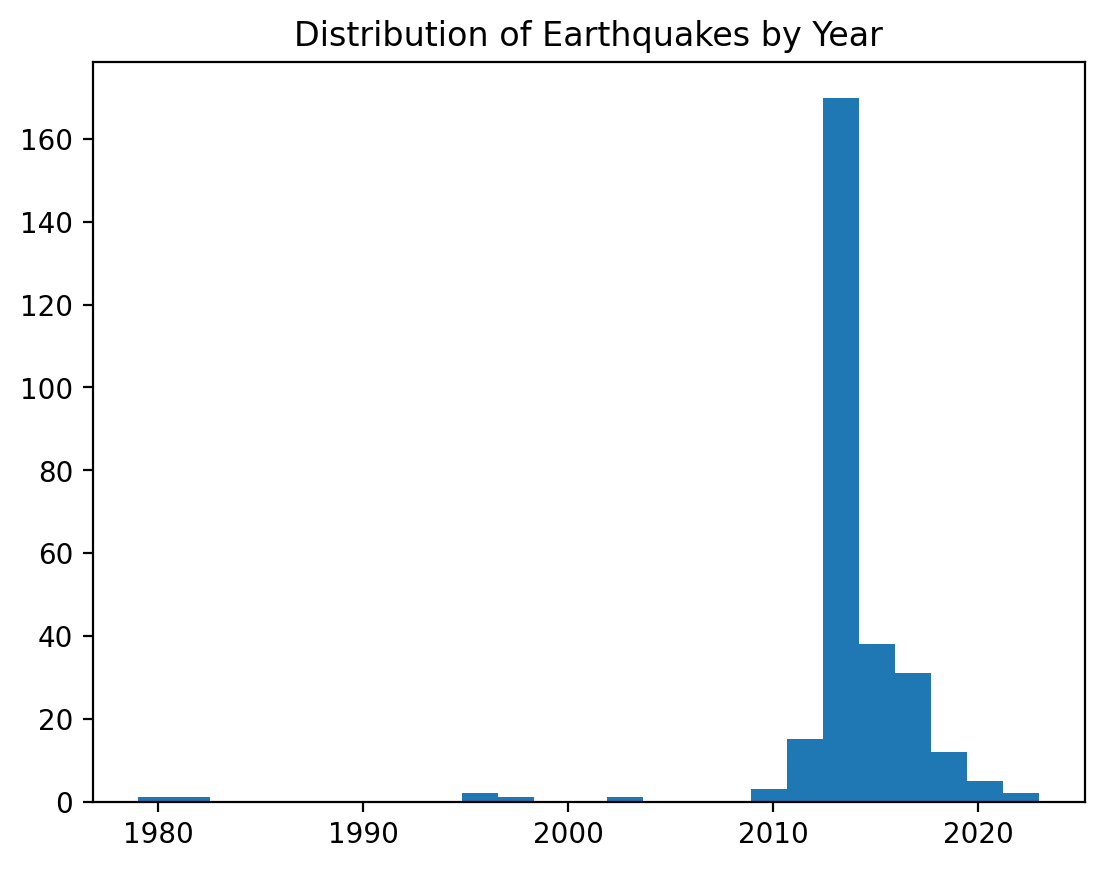

Text(0.5, 1.0, 'Locations of EQ >4, still need mag to be shown')

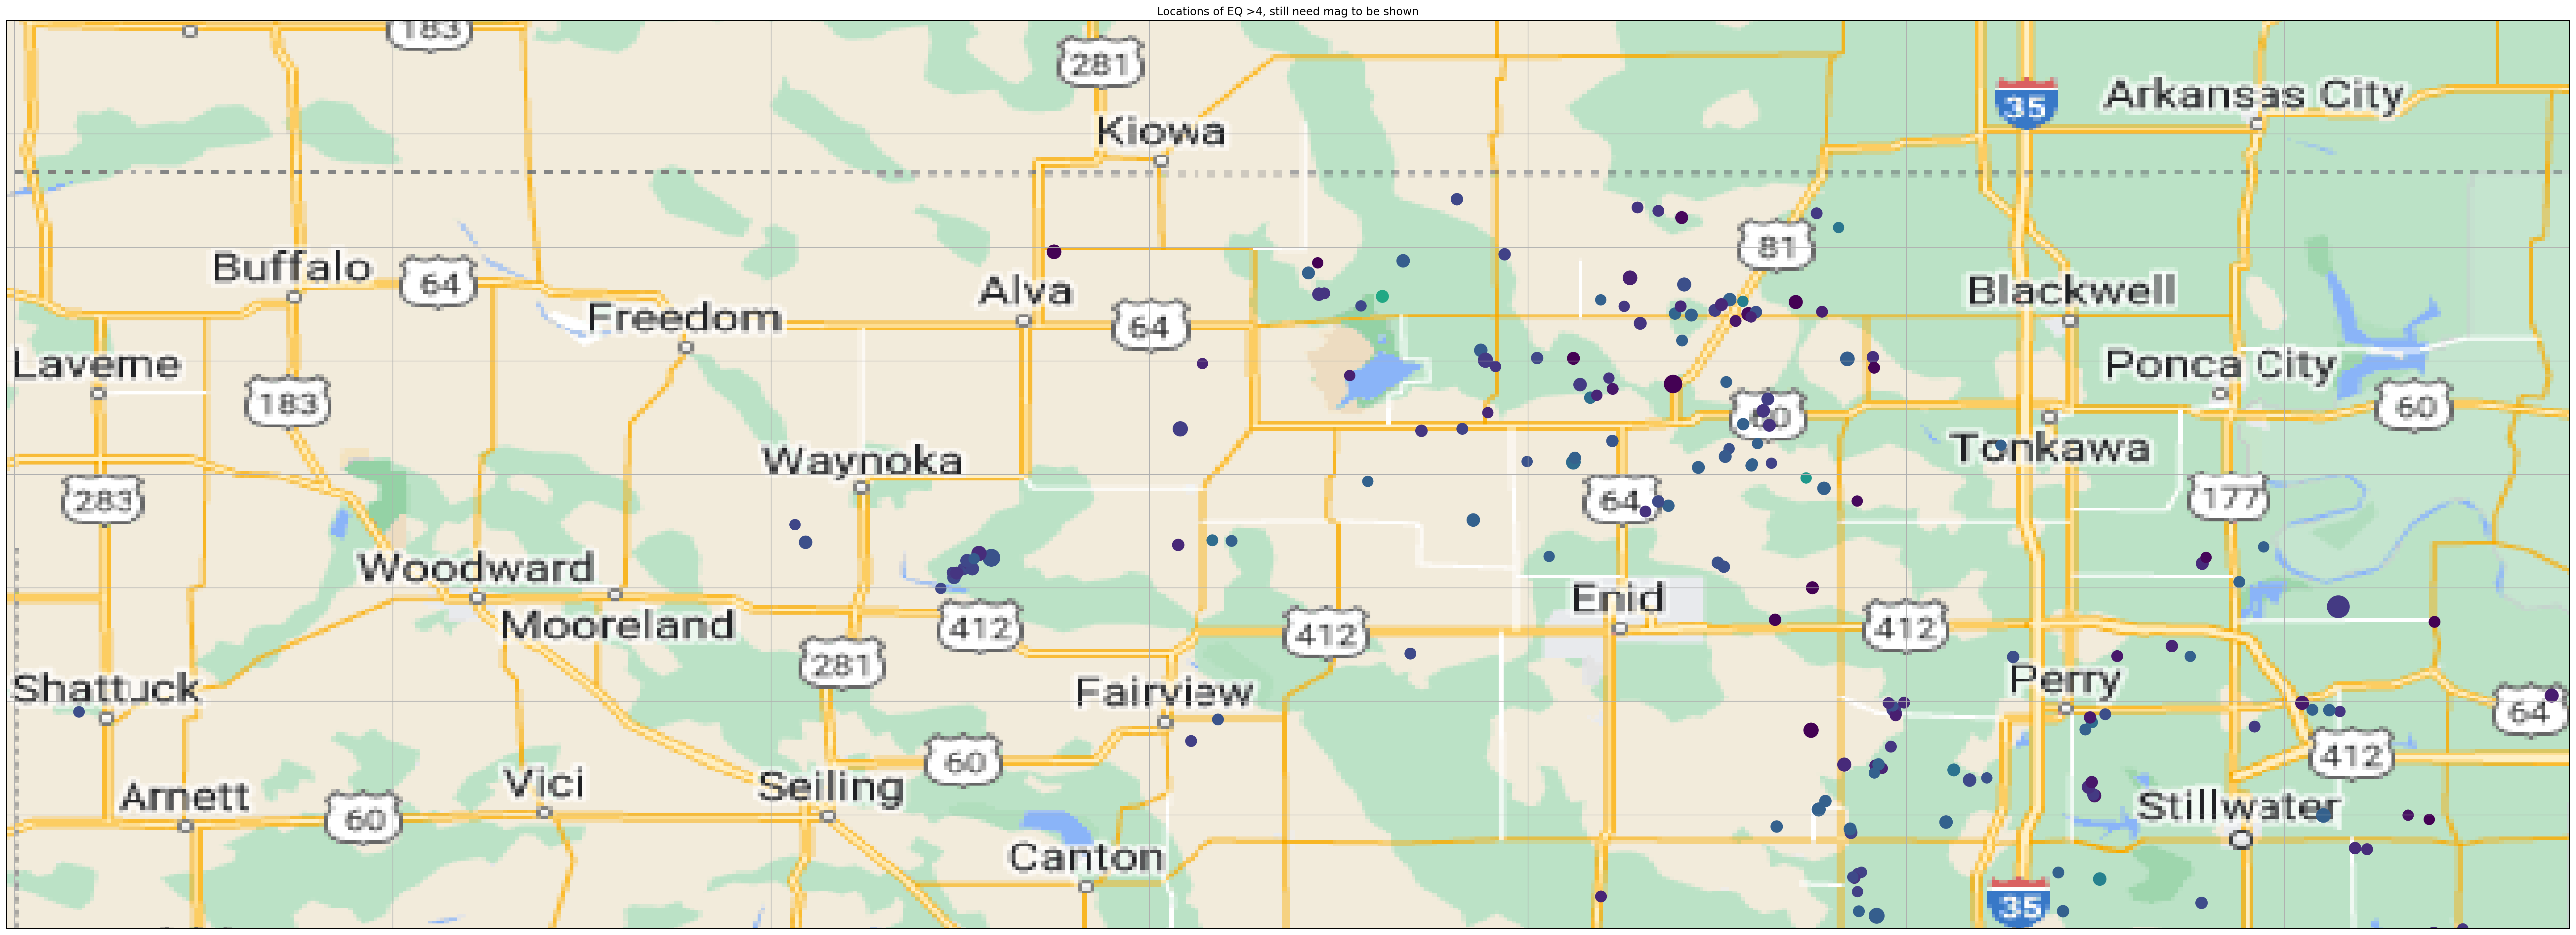

In [36]:
currentDT = datetime.datetime.now()
#print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2023-10-29T00:00:00") #end time of the request
minMag = 4
# read https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html
catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=30, maxlatitude=40,
minlongitude=-110, maxlongitude=-90, minmagnitude=minMag)



currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

years, evmag, evlat, evlon, evdep, num_eq = counter(catalog)

print('The total number of earthquakes in Oaklahoma is:', num_eq)

plt.hist(years, bins=25)
plt.title('Distribution of Earthquakes by Year')
plt.show()




fig = plt.figure(figsize=(50,30)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([-100.010302,-96.623809,36,37.2], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(evlon, evlat, c=evdep,s=evmag,transform=ccrs.PlateCarree()) 
plt.title('Locations of EQ >4, still need mag to be shown')

Download began:  2023-11-01 23:01:47.500359
Download ended:  2023-11-01 23:02:03.759087
The total number of earthquakes in Oaklahoma is: 3116


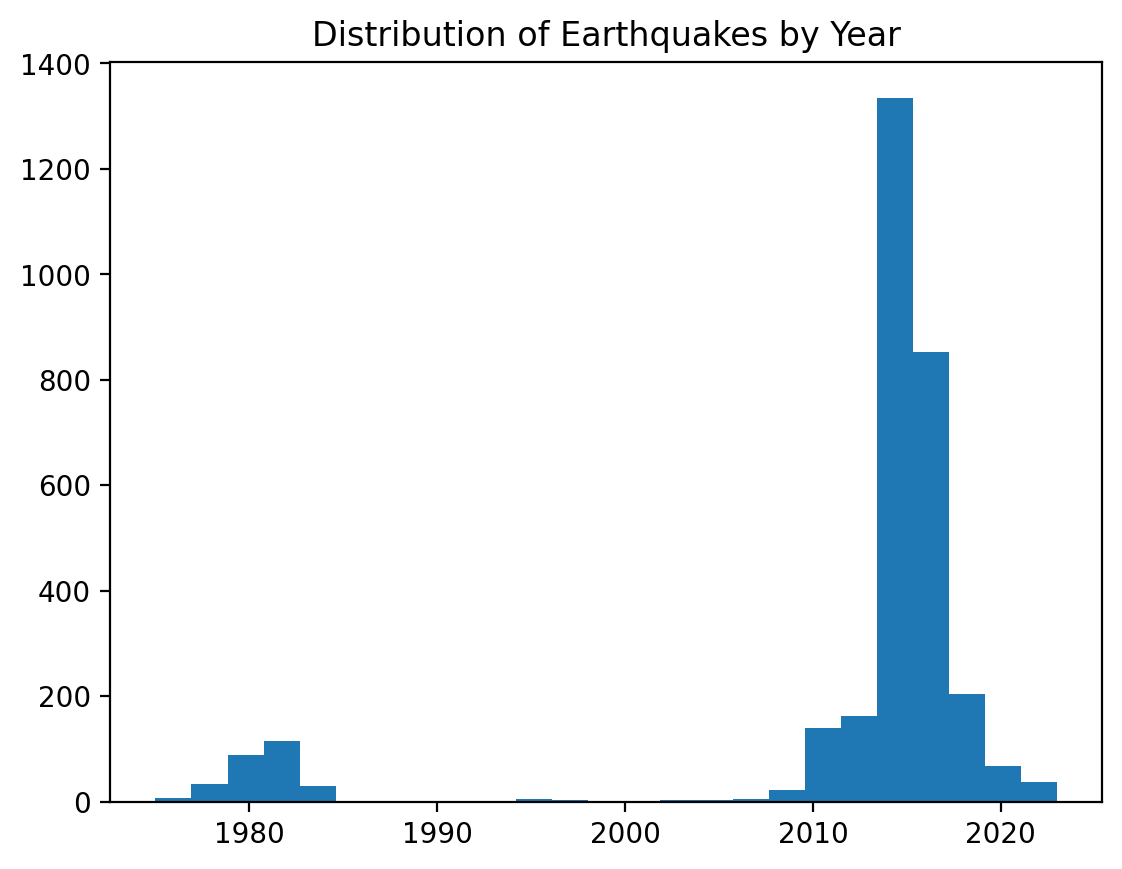

Text(0.5, 1.0, 'Locations of EQ >3, still need mag to be shown')

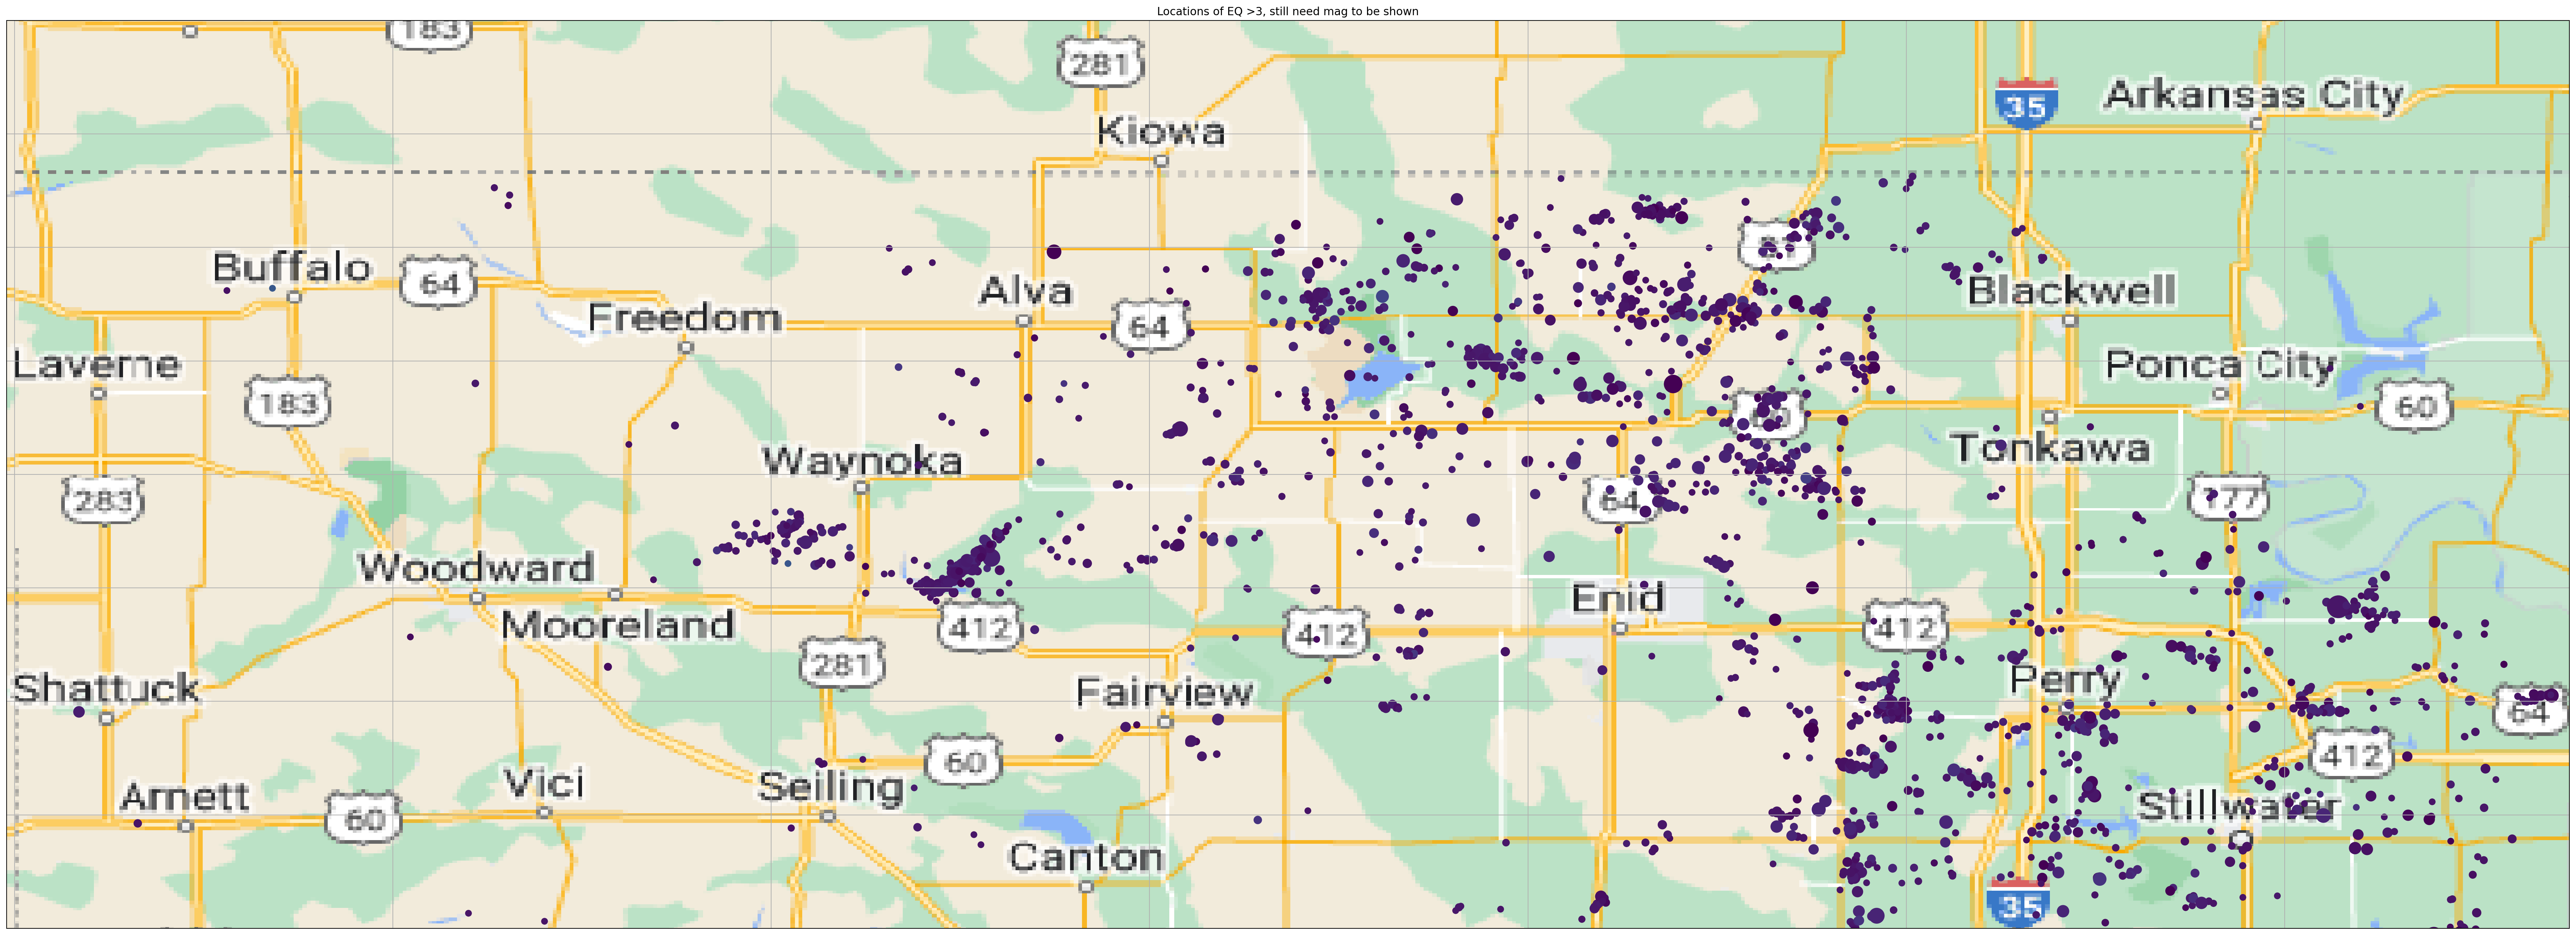

In [35]:
currentDT = datetime.datetime.now()
#print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("1970-01-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2023-10-29T00:00:00") #end time of the request
minMag = 3
# read https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html
catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=30, maxlatitude=40,
minlongitude=-110, maxlongitude=-90, minmagnitude=minMag)



currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

years, evmag, evlat, evlon, evdep, num_eq = counter(catalog)

print('The total number of earthquakes in Oaklahoma is:', num_eq)

plt.hist(years, bins=25)
plt.title('Distribution of Earthquakes by Year')
plt.show()




fig = plt.figure(figsize=(50,30)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([-100.010302,-96.623809,36,37.2], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(evlon, evlat, c=evdep,s=evmag,transform=ccrs.PlateCarree()) 
plt.title('Locations of EQ >3, still need mag to be shown')

2.0 earthquakes will be massive. Lots...


Download began:  2023-11-01 23:04:18.943709
Download ended:  2023-11-01 23:04:19.777439
The total number of earthquakes in Oaklahoma is: 306


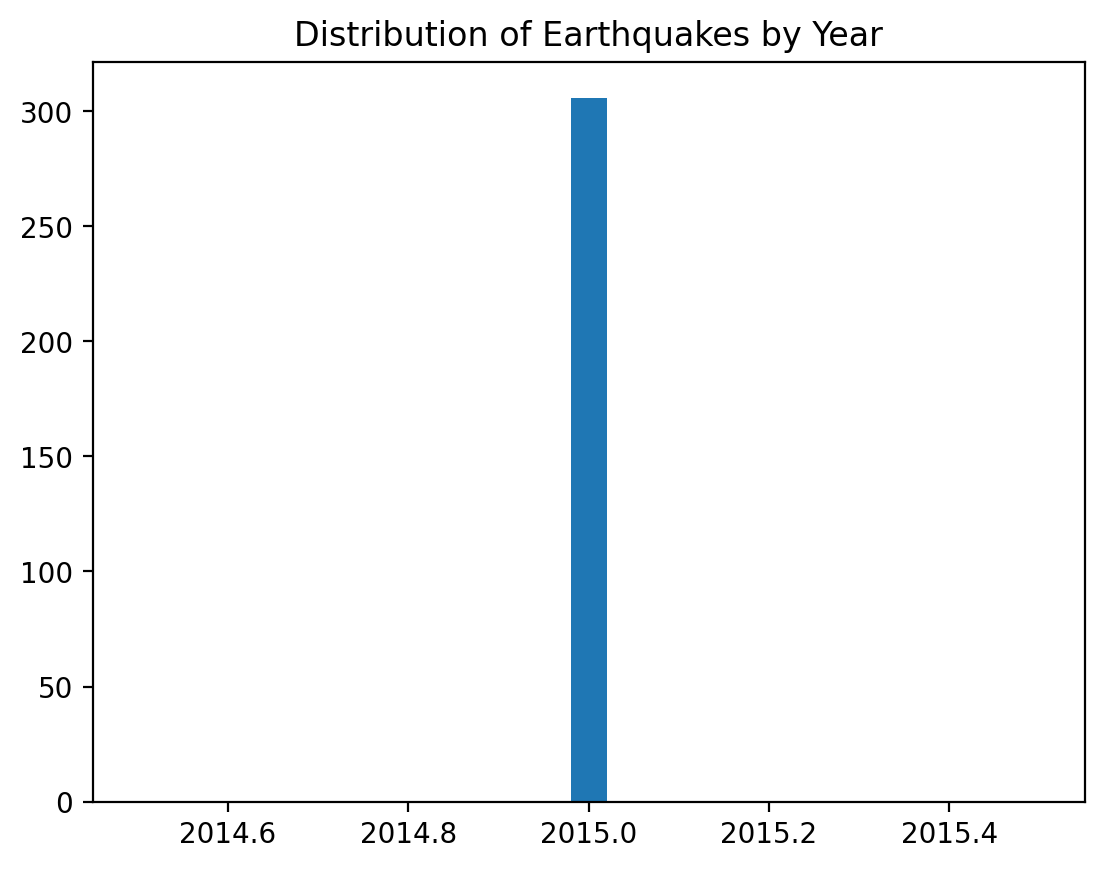

Text(0.5, 1.0, 'Locations of EQ >4, still need mag to be shown')

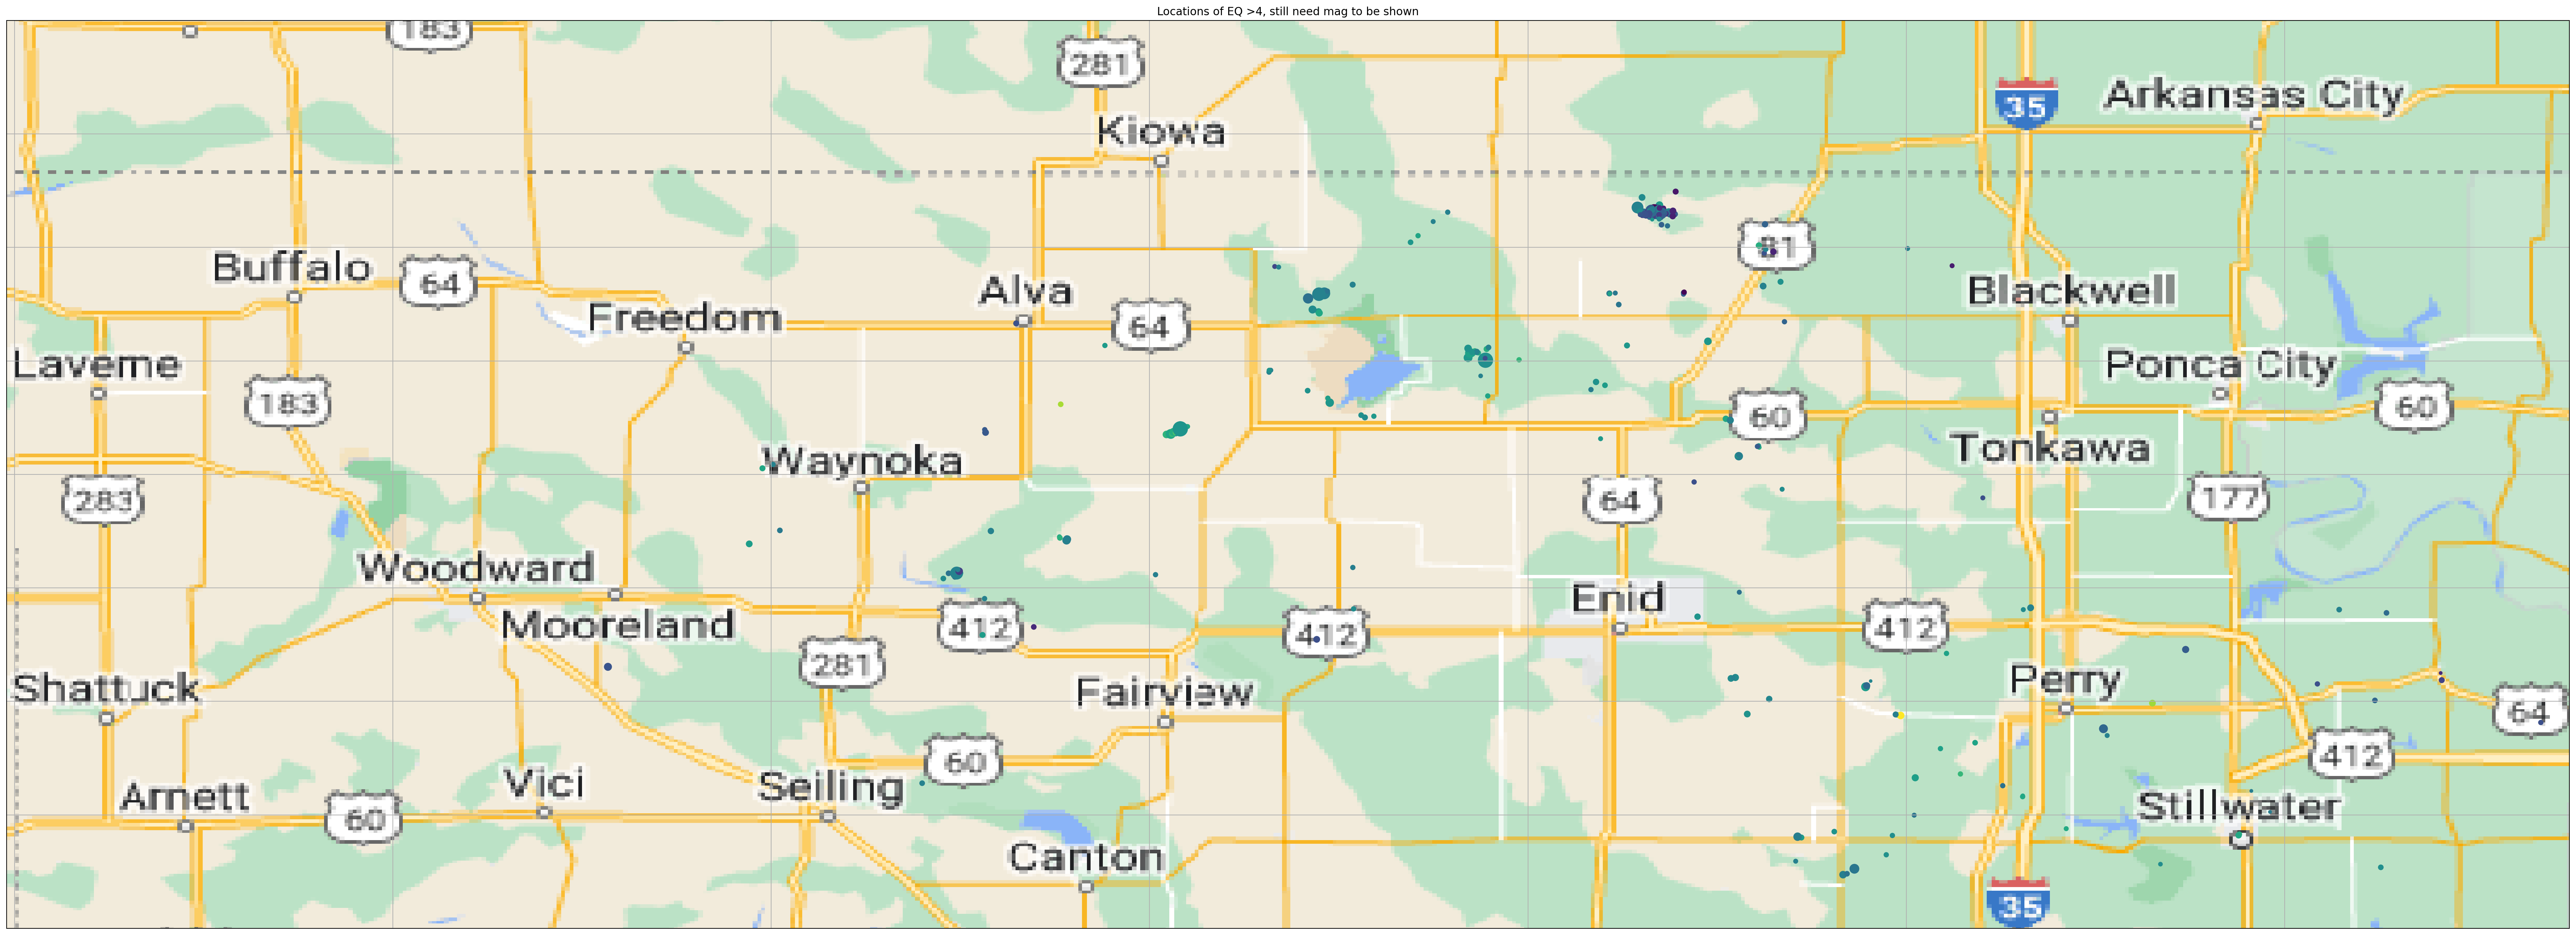

In [39]:
currentDT = datetime.datetime.now()
#print ('Download initiated. Should take about 8 seconds but requires an internet connection.')
print ('Download began: ',str(currentDT))

client = Client("IRIS")
t1 = op.UTCDateTime("2015-11-01T00:00:00") #start time of the request
t2 = op.UTCDateTime("2015-12-01T00:00:00") #end time of the request
minMag = 2
# read https://docs.obspy.org/packages/autogen/obspy.clients.fdsn.client.Client.get_events.html
catalog = client.get_events(starttime=t1, endtime=t2, minlatitude=30, maxlatitude=40,
minlongitude=-110, maxlongitude=-90, minmagnitude=minMag)



currentDT = datetime.datetime.now()
print ('Download ended: ',str(currentDT))

years, evmag, evlat, evlon, evdep, num_eq = counter(catalog)

print('The total number of earthquakes in Oaklahoma is:', num_eq)

plt.hist(years, bins=25)
plt.title('Distribution of Earthquakes by Year')
plt.show()




fig = plt.figure(figsize=(50,30)) 
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) 
ax.set_extent([-100.010302,-96.623809,36,37.2], crs=ccrs.PlateCarree()) 
ax.gridlines() 
 
import cartopy.io.img_tiles as cimgt 
request = cimgt.GoogleTiles() 
ax.add_feature(cfeature.BORDERS, linestyle=':') 
ax.add_image(request, 8) 
 
ax.scatter(evlon, evlat, c=evdep,s=evmag,transform=ccrs.PlateCarree()) 
plt.title('Locations of EQ >4, still need mag to be shown')